Following the methodology used by Hamidreza Zareipour et al. (Electricity market price volatility: The case of Ontario), we estimate the volatility of the price (hoep) over 2015-2019 period in order to explain variation observed in the energy arbitrage value over the same period of time.

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta, date

# Import data 
df = pd.read_csv("HOEP_2015-2019_dataset.csv")
df2015 = df.loc[:8759]  # this is beginning of year 2019
df2016 = df.loc[8760:17543]
df2017 = df.loc[17544:26303]
df2018 = df.loc[26304:35063]
df2019 = df.loc[35064:] 

# create datetimeindex
df['Datetime'] = pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour, unit='h')
df = df[['Datetime', 'Hour', 'HOEP','MktDem', 'OntDem']]
a = abs(min(df.HOEP)) + 1 # create param for the min of HOEP over 2015-2019 to use log
hours = np.arange(1, 43825)
df['Hours']= pd.DataFrame(data=hours, columns = ["Hours"])
df['Day_count'] = ((df["Hours"]-1)//24)+1
df

,Datetime,Hour,HOEP,MktDem,OntDem,Hours,Day_count
0,2015-01-01 01:00:00,1,3.28,18358,14960,1,1
1,2015-01-01 02:00:00,2,0.00,18012,14476,2,1
2,2015-01-01 03:00:00,3,0.00,17795,13979,3,1
3,2015-01-01 04:00:00,4,0.00,17559,13670,4,1
4,2015-01-01 05:00:00,5,0.00,17402,13567,5,1
...,...,...,...,...,...,...,...
43819,2019-12-31 20:00:00,20,0.00,18402,15909,43820,1826
43820,2019-12-31 21:00:00,21,0.00,17574,15198,43821,1826
43821,2019-12-31 22:00:00,22,-0.05,16872,14678,43822,1826
43822,2019-12-31 23:00:00,23,-0.04,16562,14136,43823,1826


In [11]:
# Compute return for different number of lags h
df['r_t_1'] = np.log(df.HOEP + a) - np.log(df.HOEP.shift(1) + a) # create log of HOEP - HOEPt-1
df['r_t_6'] = np.log(df.HOEP + a) - np.log(df.HOEP.shift(6) + a) # create log of HOEP - HOEPt-24
df['r_t_12'] = np.log(df.HOEP + a) - np.log(df.HOEP.shift(12) + a) # create log of HOEP - HOEPt-24
df['r_t_18'] = np.log(df.HOEP + a) - np.log(df.HOEP.shift(18) + a) # create log of HOEP - HOEPt-24
df['r_t_24'] = np.log(df.HOEP + a) - np.log(df.HOEP.shift(24) + a) # create log of HOEP - HOEPt-24

# Get average of each day return
df_bar = df.groupby(['Day_count'], as_index=False).mean() # length 4 years days
r_bar_t_1 =  list(df_bar.r_t_1)# length 43824
r_bar_t_6 = list(df_bar.r_t_6)
r_bar_t_12 = list(df_bar.r_t_12)
r_bar_t_18 = list(df_bar.r_t_18)
r_bar_t_24 = list(df_bar.r_t_24)

n = 24
df['r_bar_t_1'] = [item for item in r_bar_t_1 for i in range(n)]
df['r_bar_t_6'] = [item for item in r_bar_t_6 for i in range(n)]
df['r_bar_t_12'] = [item for item in r_bar_t_12 for i in range(n)]
df['r_bar_t_24'] = [item for item in r_bar_t_24 for i in range(n)]
df['r_bar_t_18'] = [item for item in r_bar_t_18 for i in range(n)]
df = df.dropna()
df.head()

,Datetime,Hour,HOEP,MktDem,OntDem,Hours,Day_count,r_t_1,r_t_6,r_t_12,r_t_18,r_t_24,r_bar_t_1,r_bar_t_6,r_bar_t_12,r_bar_t_24,r_bar_t_18
24,2015-01-02 01:00:00,1,1.87,17666,14037,25,2,0.013964,-0.089771,-0.115827,0.027097,-0.019957,0.015855,0.087533,0.156575,0.214204,0.193834
25,2015-01-02 02:00:00,2,11.43,17566,13548,26,2,0.128102,-0.029494,0.016869,0.155199,0.155199,0.015855,0.087533,0.156575,0.214204,0.193834
26,2015-01-02 03:00:00,3,7.52,17460,13410,27,2,-0.050427,0.014523,0.043526,0.104773,0.104773,0.015855,0.087533,0.156575,0.214204,0.193834
27,2015-01-02 04:00:00,4,7.50,17218,13344,28,2,-0.000265,0.021667,0.067029,0.029949,0.104508,0.015855,0.087533,0.156575,0.214204,0.193834
28,2015-01-02 05:00:00,5,2.31,16872,13420,29,2,-0.071140,-0.049879,-0.068756,-0.028707,0.033368,0.015855,0.087533,0.156575,0.214204,0.193834


In [12]:
def volatility(r, r_bar):
    return (r - r_bar)**2

df['sigma_t_1'] = df.apply(lambda x: volatility(x['r_t_1'], x['r_bar_t_1']), axis=1)
df['sigma_t_6'] = df.apply(lambda x: volatility(x['r_t_6'], x['r_bar_t_6']), axis=1)
df['sigma_t_12'] = df.apply(lambda x: volatility(x['r_t_12'], x['r_bar_t_12']), axis=1)
df['sigma_t_18'] = df.apply(lambda x: volatility(x['r_t_18'], x['r_bar_t_18']), axis=1)
df['sigma_t_24'] = df.apply(lambda x: volatility(x['r_t_24'], x['r_bar_t_24']), axis=1)

df_sigma = df[['Datetime','Hours','Day_count','sigma_t_1','sigma_t_6','sigma_t_12','sigma_t_18','sigma_t_24']]
df_sigma = df_sigma.groupby(pd.Grouper(key='Day_count')).sum()
df_sigma

,Hours,sigma_t_1,sigma_t_6,sigma_t_12,sigma_t_18,sigma_t_24
Day_count,,,,,,
2,876,0.748556,1.170505,0.889312,1.081694,0.723371
3,1452,1.397286,2.217419,2.550562,1.291505,1.388487
4,2028,0.032297,0.520655,0.665828,1.190700,1.204033
5,2604,0.082645,0.555412,1.039099,1.091531,0.502603
6,3180,0.391216,0.405756,0.584109,0.973457,1.240828
...,...,...,...,...,...,...
1822,1049196,0.193310,0.549084,1.179965,1.040391,0.465664
1823,1049772,0.094510,0.151809,0.242878,0.338470,0.335315
1824,1050348,0.172737,0.835312,1.103368,0.619467,0.192083


In [13]:
df_sigma[['sigma_t_1','sigma_t_6','sigma_t_12','sigma_t_18','sigma_t_24']] = \
df_sigma[['sigma_t_1','sigma_t_6','sigma_t_12','sigma_t_18','sigma_t_24']].div(23,axis=0).apply(np.sqrt)

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

date_list = []
start_dt = date(2015, 1, 2)
end_dt = date(2019, 12, 31)
for dt in daterange(start_dt, end_dt):
    date_list.append(dt.strftime("%Y-%m-%d"))
    
df_sigma['Date'] = date_list
df_sigma['Year'] = pd.DatetimeIndex(df_sigma['Date']).year
df_sigma_mean = df_sigma.groupby(pd.Grouper(key='Year')).mean()
df_sigma_mean = df_sigma_mean[['sigma_t_1','sigma_t_6','sigma_t_12','sigma_t_18','sigma_t_24']].round(3)
df_sigma_mean

,sigma_t_1,sigma_t_6,sigma_t_12,sigma_t_18,sigma_t_24
Year,,,,,
2015,0.121,0.212,0.223,0.221,0.175
2016,0.098,0.189,0.199,0.194,0.149
2017,0.121,0.221,0.229,0.225,0.182
2018,0.120,0.220,0.232,0.225,0.172
2019,0.100,0.175,0.183,0.182,0.148


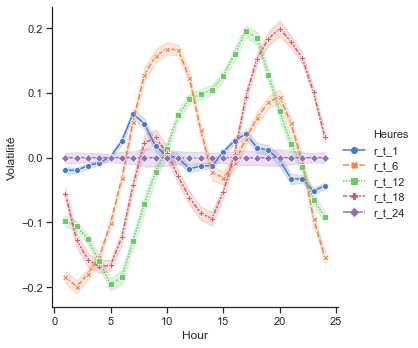

In [14]:
%matplotlib inline  
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
sns.set() # use seaborn style

df_r = df[['Hour','r_t_1','r_t_6','r_t_12','r_t_18','r_t_24']]
df_r = df_r.melt(id_vars=['Hour'],value_vars=['r_t_1','r_t_6','r_t_12','r_t_18','r_t_24'],
                          var_name='Heures', value_name='Volatilité')

with sns.axes_style("ticks", {"grid.color": "white"}):
    sns.set_palette("bright")
    g = sns.relplot(x="Hour", y="Volatilité", hue='Heures',style='Heures', markers=True,
                 kind='line', palette="muted", legend="full", data=df_r)